# Copia: quickstart

In [1]:
import pandas as pd

Load data:

In [2]:
df = pd.read_csv('datasets/dum.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Aiol (1),"Leiden, UB, BPL 1049; Brussel, KB, IV 816"
1,Aiol (2),"Breda, Arch. Begijnhof, z.s."
2,Alexanders geesten,"München, Bayerische Staatsbibliotheek, Cod. ge..."
3,Alexanders geesten,"Gent, UB, 2749,6"
4,Alexanders geesten,"Leiden, UB, Ltk. 1196"


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)
print(abundance.sum())

[ 1  1  5  2  1  2  1  1  2  2  3  3  1  1  2  1  1  1  1  2  1  1  1  1
  1  1  4  1  1  7  1  1  3  1 10  1  3  2 10  4  2  1  3  6  5  2  5  2
  5  1  1  1  1  1  2 17  2  1  1  2  1  1  1  3  1  1  1  1  1  1  1  1
  1  1  1]
167


In [4]:
from copia.hill import hill_numbers
hill_numbers(abundance)

100%|██████████| 1000/1000 [00:15<00:00, 64.11it/s]


({'richness': array([75.        , 72.57471131, 70.11423891, 67.62802576, 65.12683766,
         62.62262194, 60.12827972, 57.65735208, 55.22363058, 52.84071304,
         50.52153571, 48.27791913, 46.12016685, 44.0567517 , 42.09411441,
         40.23658569, 38.48642866, 36.8439852 , 35.30790138, 33.87540267,
         32.54259043, 31.30473499, 30.15654698, 29.09241475, 28.10660216,
         27.19340554, 26.34727215, 25.56288464, 24.83521682, 24.1595663 ,
         23.53156927]),
  'lci': array([66.628     , 64.24038621, 61.85036436, 59.31939548, 56.78087779,
         54.36070452, 51.80277784, 49.44609471, 47.02271209, 44.66801489,
         42.4523413 , 40.35065363, 38.32119466, 36.2413188 , 34.27238956,
         32.37519362, 30.64588437, 29.05036334, 27.65218531, 26.29982996,
         24.94307953, 23.68814024, 22.69099526, 21.76653674, 20.69206554,
         19.98501382, 19.24623874, 18.52480067, 17.86294569, 17.25593101,
         16.69781269]),
  'uci': array([83.628     , 81.46630273, 79.

100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


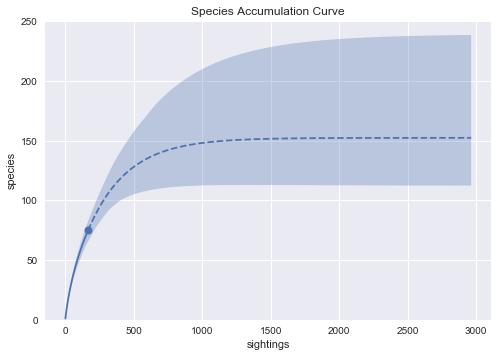

In [5]:
import copia.plot as plot
plot.species_accumulation_curve(abundance, incl_minsample=False)

100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


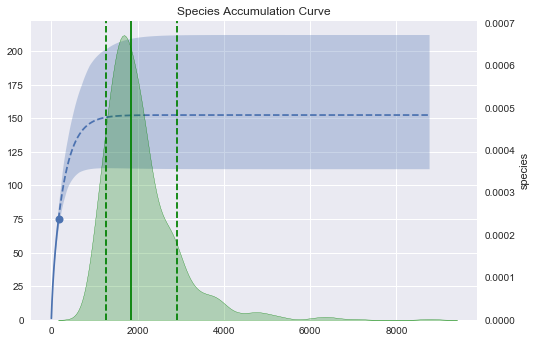

In [6]:
plot.species_accumulation_curve(abundance, incl_minsample=True)

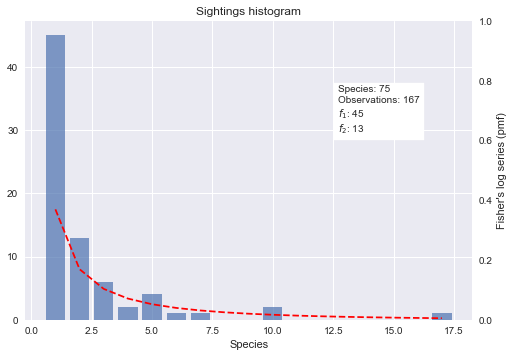

In [7]:
plot.abundance_histogram(abundance)

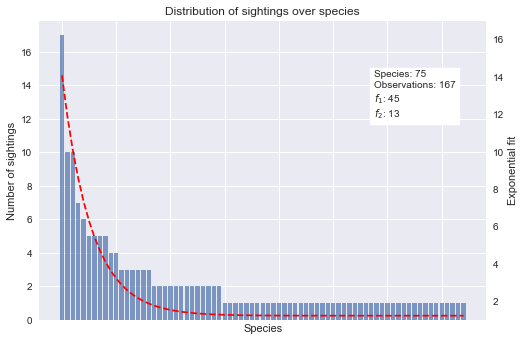

In [8]:
plot.abundance_counts(abundance)

Apply chao1:

In [9]:
from copia.richness import diversity
print('Empirical (species):', diversity(abundance)) # = diversity(abundance, method='empirical')
print('Empirical (sightings):', diversity(abundance, species=False))
print('chao1:', diversity(abundance, method='chao1'))
print('iChao1:', diversity(abundance, method='iChao1'))
print('ACE:', diversity(abundance, method='ACE'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

Empirical (species): 75
Empirical (sightings): 167
chao1: 152.41824044219254
iChao1: 171.54324044219254
ACE: 152.3244760991645
Egghe & Proot: 170.30024512537264
Jackknife: 177.0


In [10]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, return_ci=True))
print(diversity(abundance, method='jackknife', return_ci=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

{'richness': 177.0, 'order': 3}
{'richness': 177.0, 'order': 3, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}


In [11]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

2047.7560477560478
2047.7560477560478
2047.7544528130888
2047.7560477560478


/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 0.005726762492940907 > 1e-10
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')


## Compare multiple assemblages

In [12]:
assemblages = {}
for lang in ('dum', 'isl', 'gle', 'eng'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

100%|██████████| 1000/1000 [00:00<00:00, 4754.57it/s]


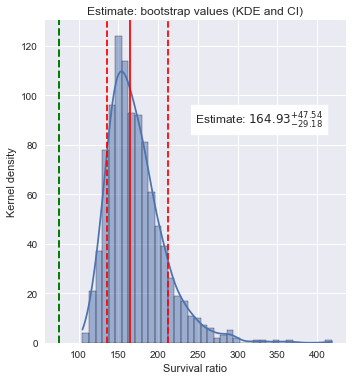

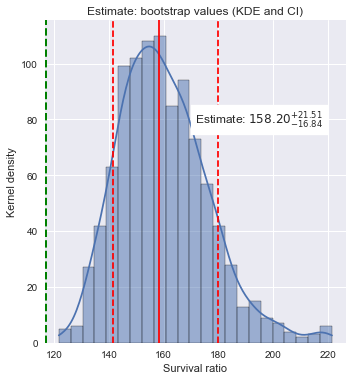

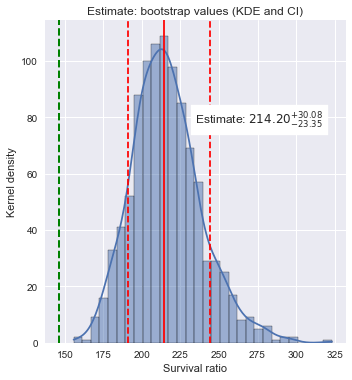

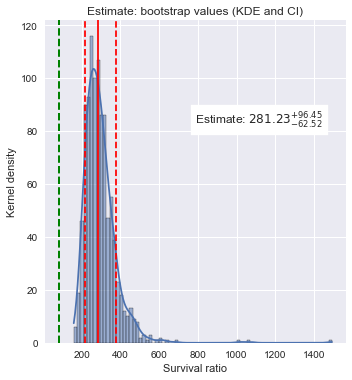

In [13]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical)

100%|██████████| 1000/1000 [00:00<00:00, 4710.34it/s]


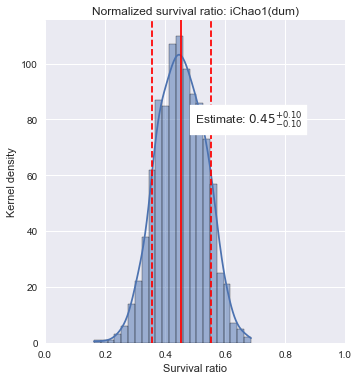

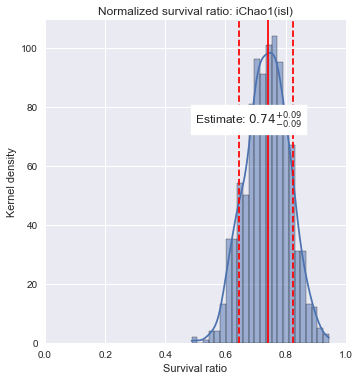

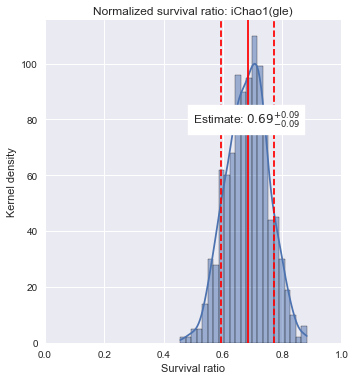

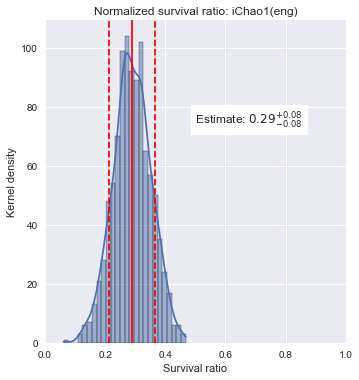

In [14]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical, normalize=True,
                          title=f'Normalized survival ratio: iChao1({lang})')

100%|██████████| 1000/1000 [00:00<00:00, 4892.44it/s]


,label,survival,lCI,uCI
0,dum,0.437208,0.600239,0.292871
1,isl,0.731366,0.886447,0.583072
2,gle,0.675742,0.834020,0.554435
3,eng,0.273754,0.404262,0.161482


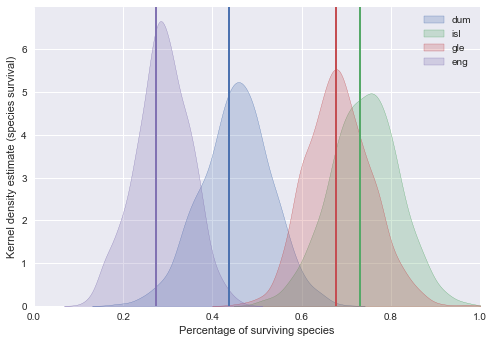

In [15]:
df = plot.survival(assemblages, method='iChao1')
df

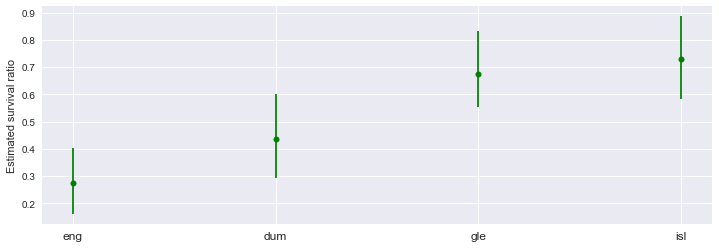

In [16]:
plot.survival_error(df)

  5%|▍         | 49/1000 [00:01<00:19, 49.69it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 95.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
 27%|██▋       | 269/1000 [00:05<00:14, 51.54it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 117.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
 42%|████▎     | 425/1000 [00:08<00:10, 52.74it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 101.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
 73%|███████▎  | 731/1000 [00:13<00:04, 55.82it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 113.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
100%|██████████| 1000/1000 [00

,label,survival,lCI,uCI
0,dum,0.081553,0.159131,0.043543
1,isl,0.203483,0.402833,0.107733
2,gle,0.168987,0.284928,0.104701
3,eng,0.030177,0.047866,0.016920


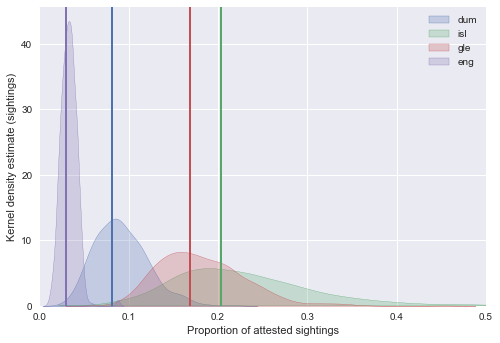

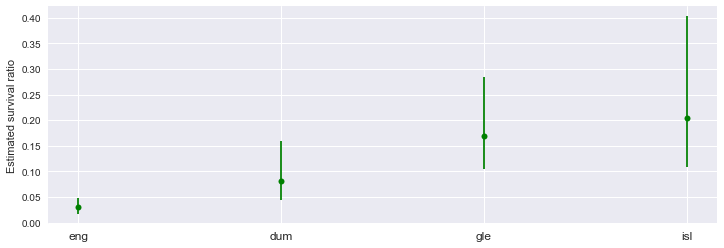

In [17]:
df = plot.survival(assemblages, method='minsample')
plot.survival_error(df)
df